In [1]:
# open csv file in pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [32]:
# Count the number of unique authors
authors = data['Author'].unique()
print(len(authors))
authors

248


array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psych

What is the average rating of the books? ✅

What is the distribution of the number of reviews received by the books?

Which book has the highest price? ✅

What is the correlation between the rating and the price of the books?

What is the distribution of the genres of the books?

In [4]:
print(data.keys())

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [5]:
numeric_features = ['User Rating', 'Reviews', 'Price', 'Year']

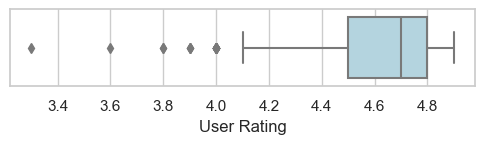

<Figure size 640x480 with 0 Axes>

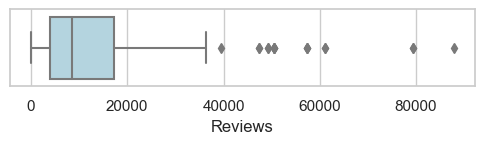

<Figure size 640x480 with 0 Axes>

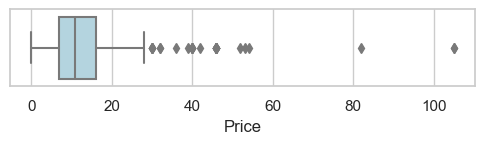

<Figure size 640x480 with 0 Axes>

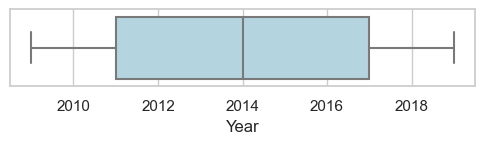

<Figure size 640x480 with 0 Axes>

In [68]:
# Create a box plot for every column in the data
for column in numeric_features:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=data[column], color='lightblue')
    plt.show()
    plt.savefig('boxplot_' + column + '.png')

In [8]:
# Create correlation matrix
corr_matrix = data[numeric_features].corr()
corr_matrix

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


C:\Users\akash\AppData\Local\Temp\ipykernel_16992\2682037360.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Correlation Matrix')

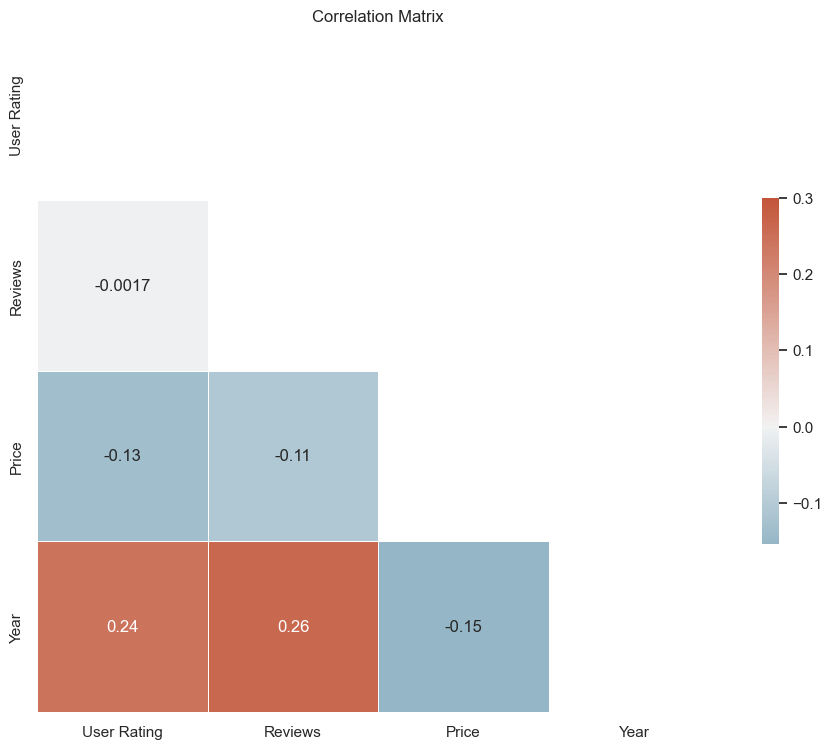

In [29]:
# Graph the Correlation Matrix
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix')

In [41]:
# Find a statistical summary of each column
for column in numeric_features:
    print(column + ' mean: ' + str(data[column].mean()))
    print(column + ' median: ' + str(data[column].median()))
    print(column + ' mode: ' + str(data[column].mode()))
    print(column + ' standard deviation: ' + str(data[column].std()))
    print(column + ' variance: ' + str(data[column].var()))
    print(column + ' max: ' + str(data[column].max()))
    print(column + ' min: ' + str(data[column].min()))
    print(column + ' range: ' + str(data[column].max() - data[column].min()))
    print(column + ' 1st quartile: ' + str(data[column].quantile(.25)))
    print(column + ' 3rd quartile: ' + str(data[column].quantile(.75)))


User Rating mean: 4.618363636363637
User Rating median: 4.7
User Rating mode: 0    4.8
Name: User Rating, dtype: float64
User Rating standard deviation: 0.2269803650251963
User Rating variance: 0.05152008610697136
User Rating max: 4.9
User Rating min: 3.3
User Rating range: 1.6000000000000005
User Rating 1st quartile: 4.5
User Rating 3rd quartile: 4.8
Reviews mean: 11953.281818181818
Reviews median: 8580.0
Reviews mode: 0    8580
Name: Reviews, dtype: int64
Reviews standard deviation: 11731.132017431892
Reviews variance: 137619458.41041565
Reviews max: 87841
Reviews min: 37
Reviews range: 87804
Reviews 1st quartile: 4058.0
Reviews 3rd quartile: 17253.25
Price mean: 13.1
Price median: 11.0
Price mode: 0    8
Name: Price, dtype: int64
Price standard deviation: 10.84226197842236
Price variance: 117.55464480874316
Price max: 105
Price min: 0
Price range: 105
Price 1st quartile: 7.0
Price 3rd quartile: 16.0
Year mean: 2014.0
Year median: 2014.0
Year mode: 0     2009
1     2010
2     2011
3 

In [ ]:
# Graph the distribution of each column
for column in data:
    plt.figure()
    sns.distplot(data[column])
    plt.show()
    plt.savefig('distplot_' + column + '.png')

In [ ]:
# Create a scatter plot of two columns
for column in data:
    plt.figure()
    sns.scatterplot(x=data[column], y=data['price'])
    plt.show()
    plt.savefig('scatterplot_' + column + '.png')

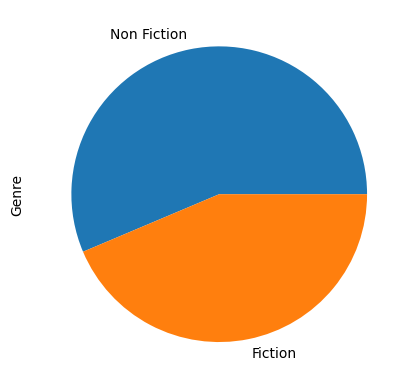

In [21]:
# Make a pie graph with all the genres
plt.figure()
data['Genre'].value_counts().plot.pie()
plt.show()

In [23]:
# Assuming 'data' is your DataFrame containing the 'Genre' column
plt.figure()
sns.set(style="whitegrid")  # This sets the background style

# Count the occurrences of each genre
genre_counts = data['Genre'].value_counts()

# Create a pie chart using Seaborn
sns.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal, so the pie chart looks circular
plt.axis('equal')

# Display the pie chart
plt.show()


AttributeError: module 'seaborn' has no attribute 'pie'

<Figure size 640x480 with 0 Axes>

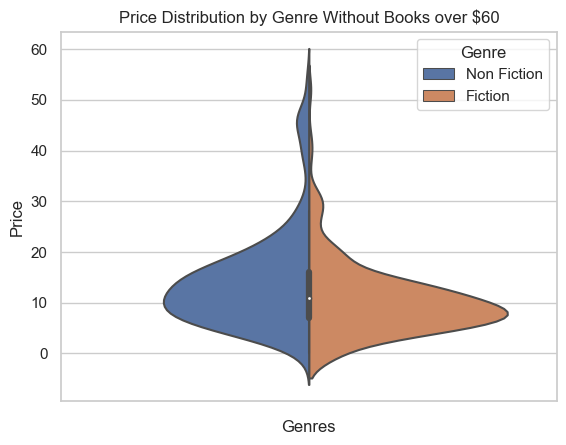

In [45]:
# Make a violin plot for each genre and price
plt.figure()
sns.set(style="whitegrid")
# make a copy of the data and remove the outliers in price
data2 = data.copy()
data2 = data2[data2['Price'] < 60]
data2['Single'] = ''

sns.violinplot(x="Single", y="Price", hue="Genre", split=True, data=data2)
plt.xlabel('Genres')
plt.title('Price Distribution by Genre Without Books over $60')
plt.show()

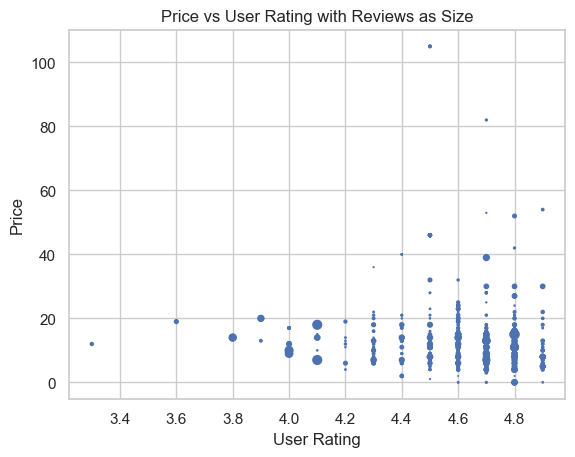

In [51]:
# make a scatter plot of rating (x) vs price (y) with the number of reviews as the size of the point
plt.figure()
plt.scatter(data['User Rating'], data['Price'], s=data['Reviews']/2000)
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.title('Price vs User Rating with Reviews as Size')
plt.show()

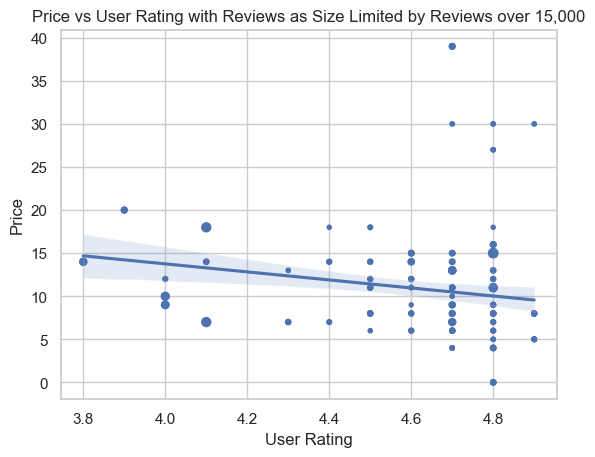

In [67]:
# make a scatter plot of rating (x) vs price (y) with the number of reviews as the size of the point
plt.figure()

data2 = data.copy()
# data2 = data2[data2['Price'] < 60]
# data2 = data2[data2['User Rating'] > 3.75]
data2 = data2[data2['Reviews'] > 15000]

plt.scatter(data2['User Rating'], data2['Price'], s=data2['Reviews']/1900)
# add a regression line
sns.regplot(x=data2['User Rating'], y=data2['Price'], scatter=False)
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.title('Price vs User Rating with Reviews as Size Limited by Reviews over 15,000')
plt.show()

In [87]:
# Find the top 50 authors by reviews
top_authors = data.groupby('Author').sum().sort_values(by='Reviews', ascending=False).head(25)
total_reviews = data['Reviews'].sum()
print(total_reviews)
top_authors

6574305


C:\Users\akash\AppData\Local\Temp\ipykernel_16992\541131653.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_authors = data.groupby('Author').sum().sort_values(by='Reviews', ascending=False).head(25)


,User Rating,Reviews,Price,Year
Author,,,,
Suzanne Collins,51.3,278329,147,22122
John Green,23.3,210419,53,10067
E L James,25.4,178011,92,12076
Dr. Seuss,43.9,176545,78,18139
Gillian Flynn,12.0,171813,29,6039
Paula Hawkins,8.2,158892,25,4031
Laura Hillenbrand,24.0,148365,77,10061
Harper Lee,27.6,146152,26,12092
Gary Chapman,52.1,145958,189,22154


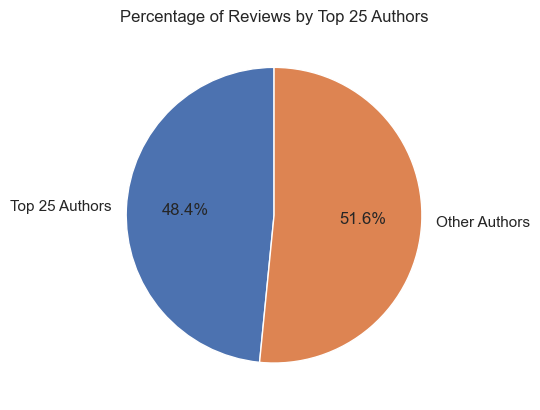

In [88]:
# make a pie chart with the combined reviews of the top 50 authors and the rest
plt.figure()
reviews = {
    'Top 25 Authors': top_authors['Reviews'].sum(),
    'Other Authors': total_reviews - top_authors['Reviews'].sum()
}

plt.pie(reviews.values(), labels=reviews.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Reviews by Top 25 Authors')
plt.show()


In [82]:
# get the total reviews of the 50 highest rated books
top_books_rating = data.sort_values(by='User Rating', ascending=False).head(25)
top_books_rating['Reviews'].sum()

1287753

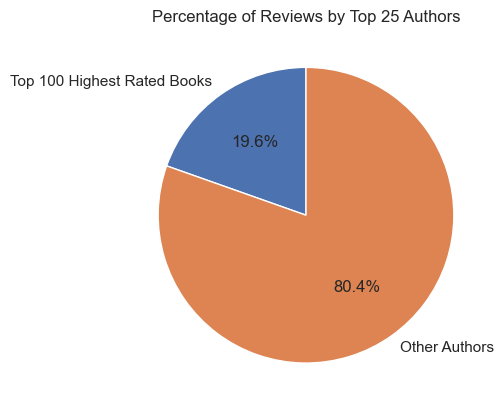

In [84]:
# graph the distribution of the top 100 books by rating
plt.figure()
reviews = {
    'Top 100 Highest Rated Books': top_books_rating['Reviews'].sum(),
    'Other Authors': total_reviews - top_books_rating['Reviews'].sum()
}

plt.pie(reviews.values(), labels=reviews.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Reviews by Top 25 Authors')
plt.show()